In [1]:
import numpy as np
from scipy.signal import savgol_filter
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from annotator_amide_abs import annotator_zoom
%matplotlib widget

In [2]:
wave_no = pd.read_csv('../mdi_optimization/cleaned_csvs/wave_no.csv')
kgy0 = pd.read_csv('../mdi_optimization/cleaned_csvs/48_scans.csv').drop(columns=['wave_no'])
kgy5 = pd.read_csv('../irradiated_analysis/5kgy/5kgy_sn48.csv')
kgy10 = pd.read_csv('../irradiated_analysis/10kgy/10kgy_sn48.csv')

doses = [kgy0, kgy5, kgy10]
colors = ['black', 'green', 'red']

for df in doses:
    df['average'] = df.iloc[:,:].mean(axis=1)

In [17]:
def annotator_zoom(ax):
    # amide 1
    amide_1 = ax.axvspan(1600, 1690, color="#7570b3", alpha=0.55)
    # amide 2
    amide_2 = ax.axvspan(1480, 1575, color="#1b9e77", alpha=0.55)
    # amide 3
    amide_3 = ax.axvspan(1229, 1301, color="#d95f02", alpha=0.55)

    ax.legend(handles=[amide_1, amide_2, amide_3], labels=['Amide I', 'Amide II', 'Amide III'],
              fontsize=7.5,
              loc='upper left')

<h1 style="text-align: center;">2nd Derivative Spectral Deconvolution</h1>

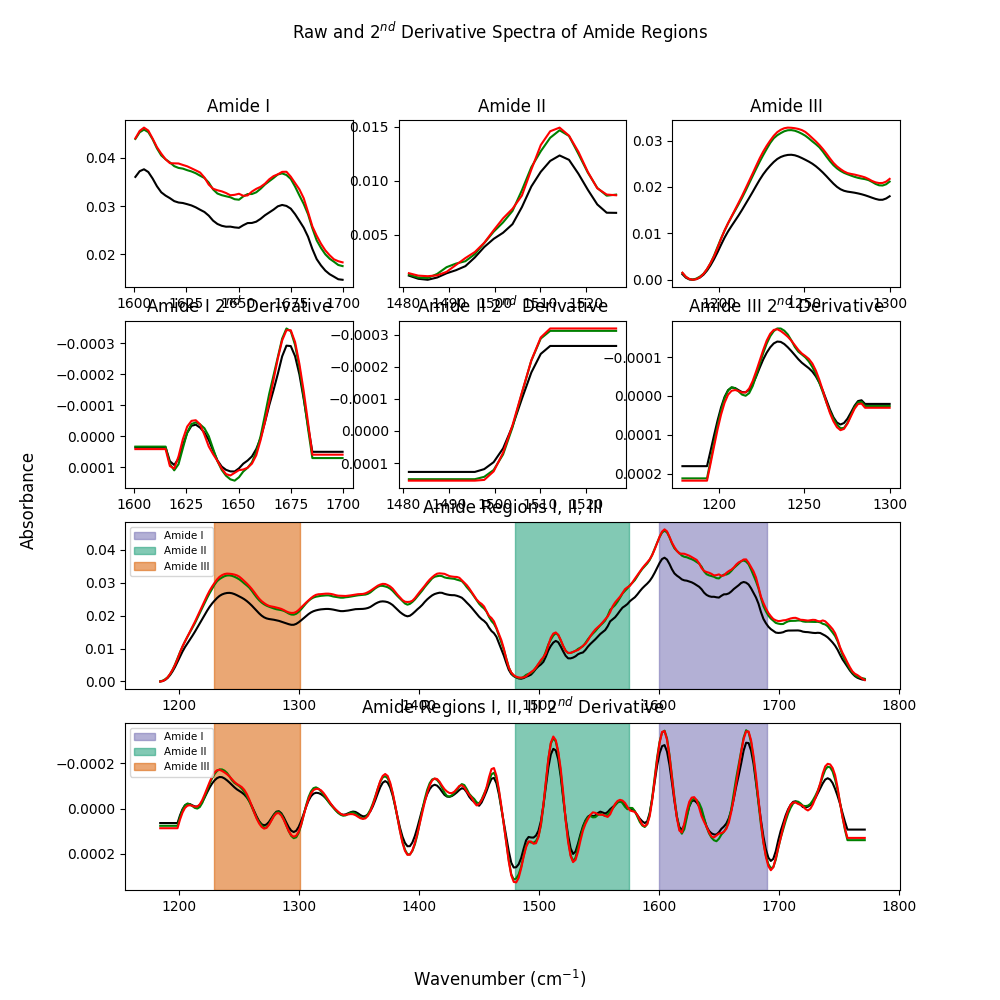

In [18]:
amide_d2 = plt.figure(layout="constrained", figsize=(10,10))
gs = GridSpec(4,3, figure=amide_d2)

amide_d2.suptitle('Raw and 2$^{nd}$ Derivative Spectra of Amide Regions')
amide_d2.supxlabel('Wavenumber (cm$^{-1}$)')
amide_d2.supylabel('Absorbance')

#Amide I
amide_1_raw = amide_d2.add_subplot(gs[0,0])
amide_1_raw.set(title='Amide I')

amide_1_d2 = amide_d2.add_subplot(gs[1,0])
amide_1_d2.set(title='Amide I 2$^{nd}$ Derivative')
amide_1_d2.invert_yaxis()

#Amide II
amide_2_raw = amide_d2.add_subplot(gs[0,1])
amide_2_raw.set(title='Amide II')

amide_2_d2 = amide_d2.add_subplot(gs[1,1])
amide_2_d2.set(title='Amide II 2$^{nd}$ Derivative')
amide_2_d2.invert_yaxis()

#Amide III
amide_3_raw = amide_d2.add_subplot(gs[0,2])
amide_3_raw.set(title='Amide III')

amide_3_d2 = amide_d2.add_subplot(gs[1,2])
amide_3_d2.set(title='Amide III 2$^{nd}$ Derivative')
amide_3_d2.invert_yaxis()

#Broad Amide
amide_all_raw = amide_d2.add_subplot(gs[2,:])
annotator_zoom(amide_all_raw)
amide_all_raw.set(title='Amide Regions I, II, III')

amide_all_d2 = amide_d2.add_subplot(gs[3,:])
annotator_zoom(amide_all_d2)
amide_all_d2.set(title='Amide Regions I, II, III 2$^{nd}$ Derivative')
amide_all_d2.invert_yaxis()

#Plot

for df, color in zip(doses, colors):
    #Amide I
    amide_1_spectrum = df['average'].iloc[1115:1164] #1600-1690
    amide_1_2d_spectrum = savgol_filter(amide_1_spectrum, window_length=15, deriv=2, polyorder=2)
    wave_no_amide_1 = wave_no.iloc[1115:1164]

    amide_1_raw.plot(wave_no_amide_1, amide_1_spectrum, color=color)
    amide_1_d2.plot(wave_no_amide_1, amide_1_2d_spectrum, color=color)

    #Amide II
    amide_2_spectrum = df['average'].iloc[1199:1222] #1480-1575 1223:1199
    amide_2_2d_spectrum = savgol_filter(amide_2_spectrum, window_length=15, deriv=2, polyorder=2)
    wave_no_amide_2 = wave_no.iloc[1199:1222]

    amide_2_raw.plot(wave_no_amide_2, amide_2_spectrum, color=color)
    amide_2_d2.plot(wave_no_amide_2, amide_2_2d_spectrum, color=color)

    #Amide III

    amide_3_spectrum = df['average'].iloc[1309:1369] #1229-1301 1309:1344
    amide_3_2d_spectrum = savgol_filter(amide_3_spectrum, window_length=15, deriv=2, polyorder=2)
    wave_no_amide_3 = wave_no.iloc[1309:1369]

    amide_3_raw.plot(wave_no_amide_3, amide_3_spectrum, color=color)
    amide_3_d2.plot(wave_no_amide_3, amide_3_2d_spectrum, color=color)

    #Amide All
    amide_all_spectrum = df['average'].iloc[1080:1366]
    amide_all_2d_spectrum = savgol_filter(amide_all_spectrum, window_length=15, deriv=2, polyorder=2)
    wave_no_amide_all = wave_no.iloc[1080:1366]

    amide_all_raw.plot(wave_no_amide_all, amide_all_spectrum, color=color)
    amide_all_d2.plot(wave_no_amide_all, amide_all_2d_spectrum, color=color)
